# Sesión 8 - Clustering y PCA

![Consar logo](https://tse1.mm.bing.net/th/id/OIP.SsMll051THRYouS2FU5BbwHaHa?rs=1&pid=ImgDetMain&o=7&rm=3)

Alan Badillo Salas

*Viernes 24, octubre 2025.*

In [2]:
import pandas

students = pandas.read_csv("student_habits_performance.csv")

students.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [3]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

In [52]:
x1 = students["age"] - 18
x2 = students["gender"].map({"Female": 1, "Male": -1, "Other": 0})  # !!!
x3 = students["study_hours_per_day"] / 12  # !!!
x4 = students["social_media_hours"] / 2  # !!!
x5 = students["netflix_hours"] / 3  # !!!
x6 = students["part_time_job"].map({"Yes": -1, "No": 1})  # !!!
x7 = students["attendance_percentage"] / 80  # !!!
x8 = students["sleep_hours"] / 8  # !!
x9 = students["diet_quality"].map({"Good": 1, "Fair": 0, "Poor": -1})  # !
x10 = students["exercise_frequency"] / 2.5  # !!!
x11 = students["parental_education_level"].map({"Bachelor": 1, "High School": 0, "Master": -1}).fillna(0)  # !!!!
x12 = students["internet_quality"].map({"Good": 1, "Average": 0, "Poor": -1})  # !!!
x13 = students["mental_health_rating"] / 5 - 1  # !!!
x14 = students["extracurricular_participation"].map({"Yes": 1, "No": -1})  # !!!
x15 = students["exam_score"] / 70  # !!!!!!!!!!

In [19]:
students["age"].value_counts().reset_index().sort_values("age")

,age,count
2,17,133
5,18,117
6,19,113
0,20,146
3,21,125
7,22,113
4,23,119
1,24,134


In [20]:
students["gender"].value_counts()

gender
Female    481
Male      477
Other      42
Name: count, dtype: int64

In [22]:
students["part_time_job"].value_counts(normalize=True)

part_time_job
No     0.785
Yes    0.215
Name: proportion, dtype: float64

In [24]:
students["attendance_percentage"]

0       85.0
1       97.3
2       94.8
3       71.0
4       90.9
       ...  
995     77.0
996     86.0
997     61.9
998    100.0
999     89.4
Name: attendance_percentage, Length: 1000, dtype: float64

In [26]:
students["diet_quality"].value_counts()

diet_quality
Fair    437
Good    378
Poor    185
Name: count, dtype: int64

In [28]:
students["parental_education_level"].value_counts()

parental_education_level
High School    392
Bachelor       350
Master         167
Name: count, dtype: int64

<Axes: xlabel='parental_education_level', ylabel='exam_score'>

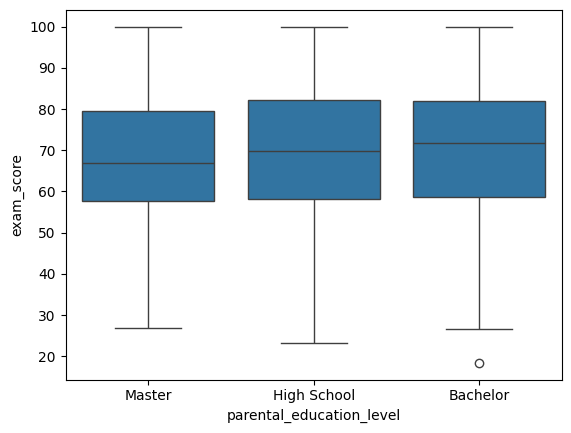

In [ ]:
import seaborn

seaborn.boxplot(
    x=students["parental_education_level"],
    y=students["exam_score"]
)

In [30]:
students["internet_quality"].value_counts()

internet_quality
Good       447
Average    391
Poor       162
Name: count, dtype: int64

In [53]:
X = pandas.DataFrame([
    x1, x2, x3, x4, x5,
    x6, x7, x8, x9, x10,
    x11, x12, x13, x14, x15,
], index=[
    "x1", "x2", "x3", "x4", "x5",
    "x6", "x7", "x8", "x9", "x10",
    "x11", "x12", "x13", "x14", "x15",
]).T

X

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15
0,5.0,1.0,0.000000,0.60,0.366667,1.0,1.06250,1.0000,0.0,2.4,-1.0,0.0,0.6,1.0,0.802857
1,2.0,1.0,0.575000,1.40,0.766667,1.0,1.21625,0.5750,1.0,2.4,0.0,0.0,0.6,-1.0,1.428571
2,3.0,-1.0,0.116667,1.55,0.433333,1.0,1.18500,1.0000,-1.0,0.4,0.0,-1.0,-0.8,-1.0,0.490000
3,5.0,1.0,0.083333,1.95,0.333333,1.0,0.88750,1.1500,-1.0,1.6,-1.0,1.0,-0.8,1.0,0.382857
4,1.0,1.0,0.416667,2.20,0.166667,1.0,1.13625,0.6125,0.0,1.2,-1.0,1.0,-0.8,-1.0,0.948571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3.0,1.0,0.216667,0.25,0.533333,1.0,0.96250,0.9375,0.0,0.8,0.0,1.0,0.2,1.0,1.087143
996,-1.0,1.0,0.241667,0.50,0.800000,-1.0,1.07500,0.8500,-1.0,0.4,0.0,0.0,0.2,1.0,0.941429
997,2.0,-1.0,0.250000,1.30,0.433333,1.0,0.77375,0.8125,1.0,2.0,1.0,1.0,0.8,1.0,0.920000
998,6.0,-1.0,0.450000,2.05,0.366667,-1.0,1.25000,0.9500,0.0,0.0,1.0,0.0,-0.8,-1.0,0.995714


In [54]:
X.isna().sum(axis=0)

x1     0
x2     0
x3     0
x4     0
x5     0
x6     0
x7     0
x8     0
x9     0
x10    0
x11    0
x12    0
x13    0
x14    0
x15    0
dtype: int64

In [74]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=8) # 0 1 2 ... 7

model.fit(X)

g = model.labels_

g # respuesta automática

array([3, 0, 4, 3, 1, 7, 2, 2, 6, 1, 1, 7, 1, 1, 7, 4, 4, 3, 6, 4, 0, 4,
       1, 6, 2, 3, 7, 5, 3, 2, 0, 5, 4, 1, 0, 2, 0, 5, 5, 4, 1, 6, 5, 6,
       0, 4, 3, 3, 0, 0, 3, 0, 1, 0, 6, 4, 7, 5, 1, 0, 1, 7, 2, 5, 3, 1,
       4, 5, 2, 7, 1, 1, 5, 1, 0, 1, 4, 0, 6, 2, 7, 4, 2, 3, 6, 4, 7, 5,
       4, 5, 7, 0, 5, 7, 0, 7, 1, 4, 3, 4, 3, 5, 5, 4, 5, 5, 3, 4, 3, 6,
       3, 6, 3, 7, 6, 0, 5, 7, 3, 2, 7, 4, 5, 6, 0, 7, 5, 1, 4, 4, 0, 0,
       1, 0, 7, 4, 1, 5, 7, 5, 7, 5, 4, 7, 3, 6, 1, 1, 1, 6, 5, 1, 1, 1,
       4, 5, 7, 5, 1, 0, 7, 5, 6, 4, 5, 5, 7, 7, 3, 2, 7, 0, 4, 0, 7, 0,
       4, 4, 5, 1, 2, 7, 7, 1, 1, 2, 1, 7, 3, 3, 7, 4, 1, 7, 7, 1, 5, 0,
       2, 1, 6, 7, 7, 5, 4, 0, 3, 0, 2, 0, 6, 3, 4, 7, 4, 0, 0, 0, 7, 6,
       1, 4, 7, 0, 1, 1, 2, 3, 5, 4, 3, 0, 0, 0, 4, 0, 7, 2, 4, 7, 5, 7,
       0, 1, 7, 3, 5, 1, 1, 1, 2, 1, 0, 4, 5, 1, 6, 0, 6, 1, 5, 2, 4, 1,
       4, 1, 0, 6, 7, 1, 2, 6, 7, 3, 1, 4, 5, 0, 1, 1, 0, 2, 2, 7, 5, 1,
       1, 4, 5, 3, 5, 1, 1, 1, 5, 0, 0, 6, 0, 6, 1,

In [75]:
from sklearn.decomposition import PCA

C = PCA(n_components=2).fit_transform(X)

c1 = C[:, 0]
c2 = C[:, 1]

<Axes: >

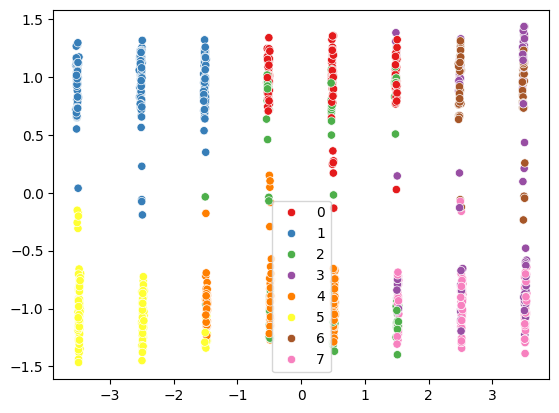

In [76]:
import seaborn

seaborn.scatterplot(x=c1, y=c2, hue=g, palette="Set1")

<Axes: xlabel='age'>

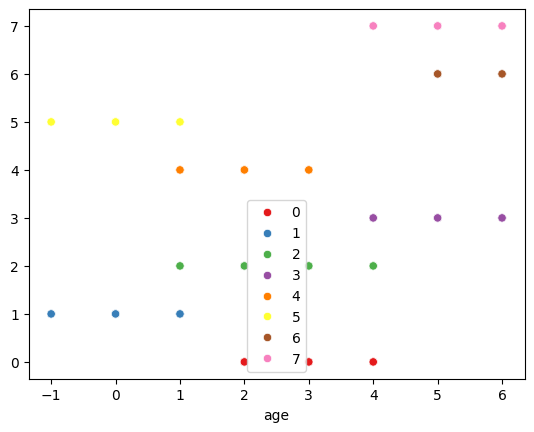

In [ ]:
seaborn.scatterplot(x=x1, y=g, hue=g, palette="Set1")

<Axes: ylabel='age'>

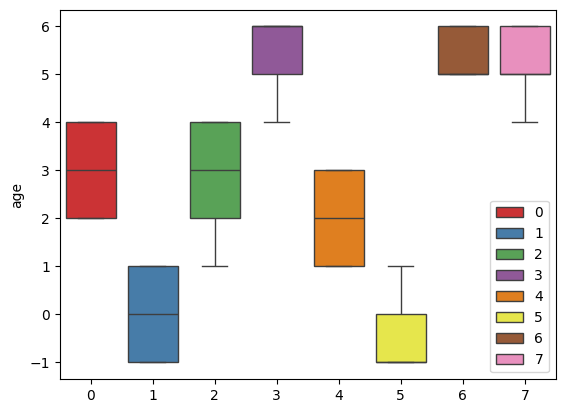

In [81]:
seaborn.boxplot(x=g, y=x1, hue=g, palette="Set1")

<Axes: ylabel='exercise_frequency'>

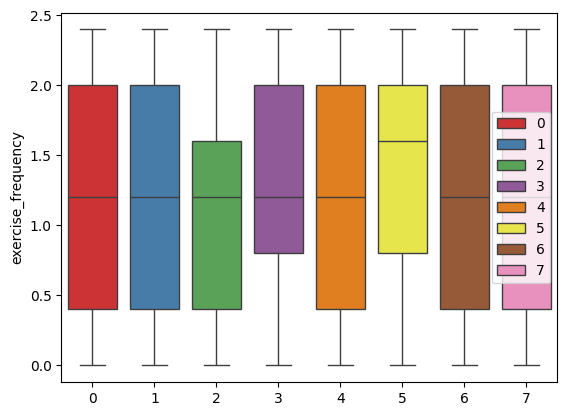

In [91]:
seaborn.boxplot(x=g, y=x10, hue=g, palette="Set1")

In [98]:
D = students.copy()

D["g"] = g

D.sort_values("g")

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score,g
691,S1691,22,Female,6.2,3.5,2.3,No,94.5,8.2,Fair,5,Bachelor,Good,8,No,100.0,0
131,S1131,21,Female,7.2,3.7,0.0,No,100.0,7.8,Good,6,High School,Good,9,No,100.0,0
133,S1133,21,Female,4.8,1.5,2.2,No,87.9,5.9,Fair,4,Bachelor,Poor,2,Yes,78.4,0
792,S1792,21,Female,2.1,3.1,4.2,No,86.4,5.2,Fair,1,Bachelor,Poor,9,Yes,50.1,0
553,S1553,20,Female,4.8,0.8,0.0,No,81.2,8.1,Good,5,High School,Average,1,No,88.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,S1393,24,Male,2.3,3.0,4.6,No,67.5,6.6,Fair,3,Bachelor,Average,9,No,51.8,7
868,S1868,23,Male,3.8,1.9,3.6,No,96.8,5.5,Fair,6,Master,Good,2,No,77.8,7
86,S1086,22,Male,3.6,1.4,2.3,No,83.1,9.5,Good,5,Bachelor,Poor,6,No,79.2,7
703,S1703,24,Male,0.9,3.3,1.6,Yes,87.3,6.5,Poor,6,Bachelor,Good,5,No,37.9,7


In [ ]:
D[D["g"] == 2]

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score,g
6,S1006,21,Female,5.6,1.5,1.4,Yes,85.8,6.5,Good,2,Master,Poor,4,No,89.8,2
7,S1007,21,Female,4.3,1.0,2.0,Yes,77.7,4.6,Fair,0,Bachelor,Average,8,No,72.6,2
24,S1024,20,Female,2.0,0.0,0.9,Yes,81.8,5.5,Fair,4,Bachelor,Average,2,No,54.9,2
29,S1029,20,Female,2.0,3.2,3.8,Yes,82.6,6.7,Poor,6,High School,Poor,10,Yes,75.7,2
35,S1035,21,Female,4.2,1.7,0.0,Yes,84.2,6.5,Good,1,Bachelor,Average,3,No,72.6,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
940,S1940,20,Other,4.1,1.7,0.1,Yes,68.8,7.2,Good,0,Master,Average,4,No,67.5,2
952,S1952,21,Female,3.6,2.1,3.5,Yes,62.3,5.7,Poor,1,High School,Average,9,No,65.6,2
962,S1962,22,Male,3.5,3.1,2.9,Yes,85.4,6.5,Good,0,Master,Average,6,No,55.1,2
982,S1982,20,Female,3.8,2.4,2.2,Yes,91.5,8.6,Fair,2,High School,Good,10,No,88.0,2


In [ ]:
D[D["g"] == 2]["gender"].value_counts() # Hombres y mujeres

gender
Female    43
Male      39
Other      4
Name: count, dtype: int64

In [ ]:
D[D["g"] == 2]["age"].value_counts() # Entre 20 y 22 años

age
20    35
22    25
21    24
19     2
Name: count, dtype: int64

In [ ]:
D[D["g"] == 2]["diet_quality"].value_counts() # Con dieta buena y media

diet_quality
Good    38
Fair    37
Poor    11
Name: count, dtype: int64

<Axes: ylabel='exam_score'>

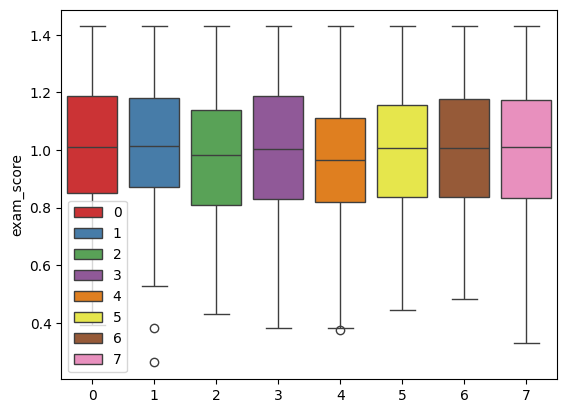

In [105]:
seaborn.boxplot(x=g, y=x15, hue=g, palette="Set1")

<Axes: ylabel='exam_score'>

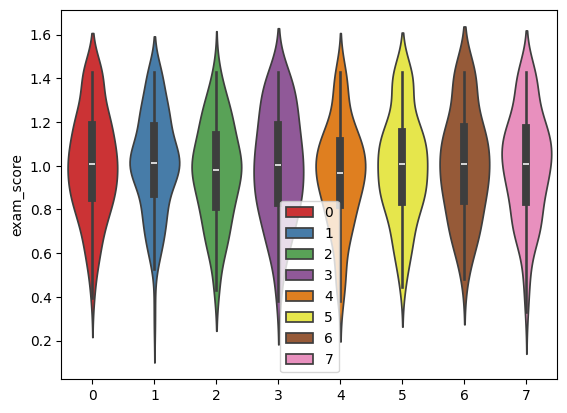

In [106]:
seaborn.violinplot(x=g, y=x15, hue=g, palette="Set1")

In [124]:
import matplotlib.pyplot as pyplot

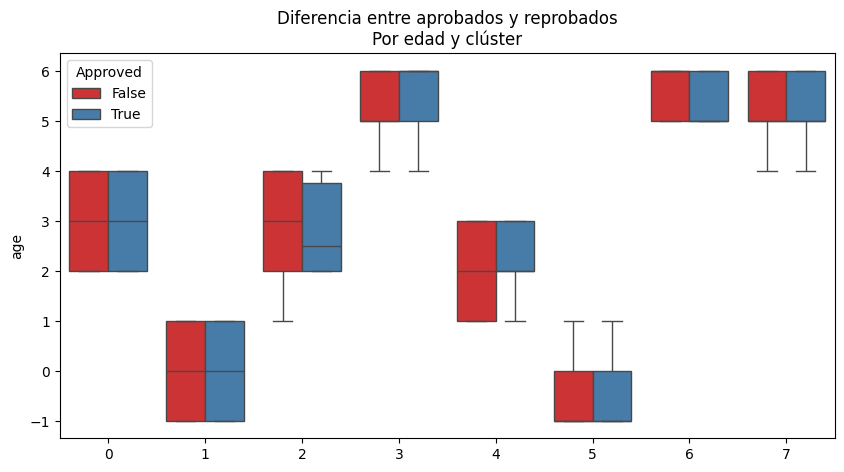

In [134]:
figure, axis = pyplot.subplots(figsize=(10, 5))
a = pandas.Series(x15 >= 1, name="Approved")
seaborn.boxplot(x=g, y=x1, hue=a, palette="Set1", ax=axis) # Diferencia de edades entre aprobados y reprobados por clúster
pyplot.title("Diferencia entre aprobados y reprobados\nPor edad y clúster")
pyplot.show()

**Comentarios**

* *Clúster 2* - Hay una ligera diferencia en las edades entre los aprobados y reprobados, en este clúster los que más reprueban tienen mayor edad (los que más aprueban tienen cerca de 20 años)
* *Clúster 4* - Hay una ligera diferencia en las edades entre los aprobados y reprobados, en este clúster los que más aprueban tienen de 20 a 21 años

Los demás clústeres no tienen diferencias significativas en edad.

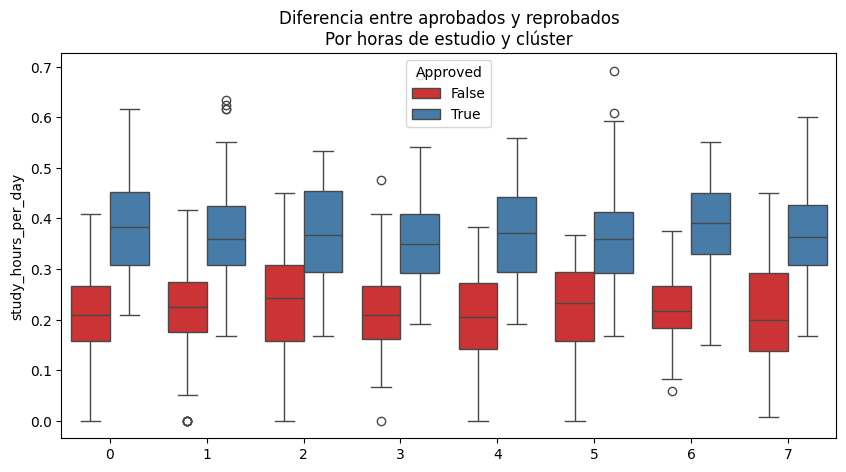

In [136]:
figure, axis = pyplot.subplots(figsize=(10, 5))
a = pandas.Series(x15 >= 1, name="Approved")
seaborn.boxplot(x=g, y=x3, hue=a, palette="Set1", ax=axis) # Diferencia en fuerza de estudio entre aprobados y reprobados por clúster
pyplot.title("Diferencia entre aprobados y reprobados\nPor horas de estudio y clúster")
pyplot.show()

**Comentarios**

Los estudiantes que aprueban estudian cerca de $0.33 * 12 = \frac{12}{3} = 4$ horas al día, mientras que los que reprueban invierten solo $0.25 * 12 = \frac{12}{4} = 3$ horas de estudio al día.

Los clústeres de mayor diferencia en las horas de estudio entre aprobados y reprobados son el *Clúster 0* y el *Clúster 6*, mientras que los de menor diferencia son el *Clúster 2* y el *Clúster 5*.

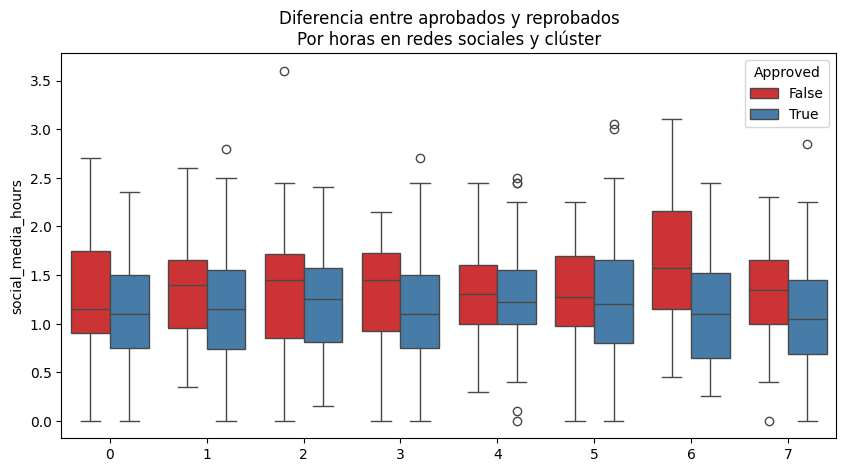

In [138]:
figure, axis = pyplot.subplots(figsize=(10, 5))
a = pandas.Series(x15 >= 1, name="Approved")
seaborn.boxplot(x=g, y=x4, hue=a, palette="Set1", ax=axis) # Diferencia en tiempo invertido en redes sociales entre aprobados y reprobados por clúster
pyplot.title("Diferencia entre aprobados y reprobados\nPor horas en redes sociales y clúster")
pyplot.show()

**Comentarios**

En todos los clústeres se observa que la cantidad invertida de pares de horas en redes sociales es mayor en los reprobados que en los aprobados.

Además, en el *Clúster 6* (alumnos de 24 a 25 años) se invierte una mayor cantidad de horas en las redes sociales (entre 2 y 4 horas al día).

En el *Clúster 4* (alumnos de 19 a 21 años) la diferencia en las horas invertidas en redes sociales entre aprobados y reprobados es la menor, pero ligeramente mayor la inversión en horas en redes sociales en los reprobados.

Se concluye que las horas invertidas en redes sociales si explica que el alumno repruebe si invierte más horas en redes sociales.

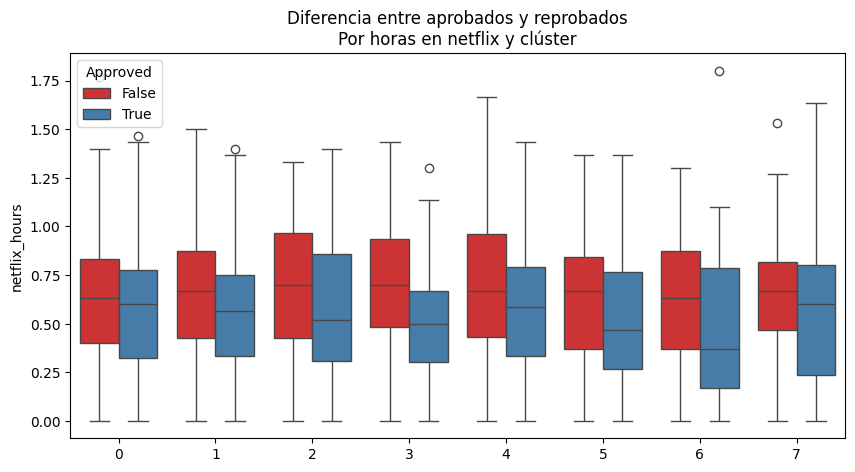

In [140]:
figure, axis = pyplot.subplots(figsize=(10, 5))
a = pandas.Series(x15 >= 1, name="Approved")
seaborn.boxplot(x=g, y=x5, hue=a, palette="Set1", ax=axis) # Diferencia en tiempo invertido en netflix entre aprobados y reprobados por clúster
pyplot.title("Diferencia entre aprobados y reprobados\nPor horas en netflix y clúster")
pyplot.show()

**Comentarios**

El efecto es similar que en redes sociales, pero con diferencias significativas en el *Clúster 2*, *Clúster 3*, *Clúster 4*, *Clúster 6*, *Clúster 7*, que sugieren que en estos clústeres se consume más Netflix en quién reprueba.

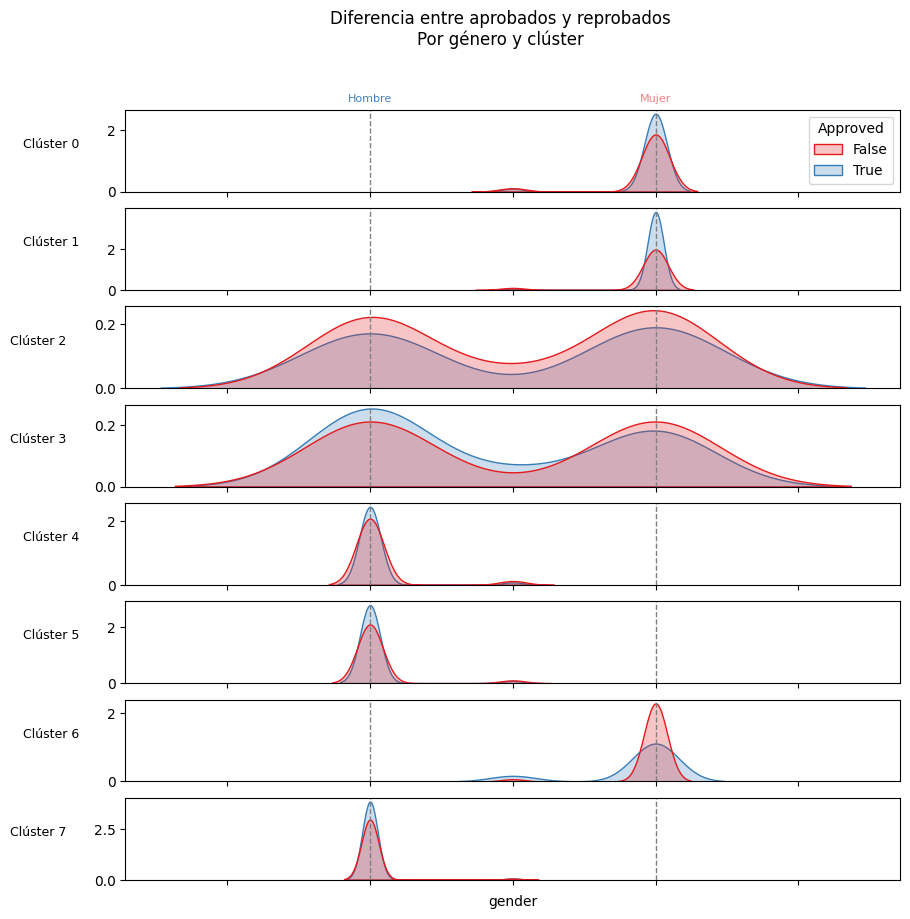

In [195]:
figure, axis = pyplot.subplots(8, 1, figsize=(10, 10), sharex=True)
a = pandas.Series(x15 >= 1, name="Approved")
for i in range(8):
    indices = pandas.Series(g)[g == i].index
    a = pandas.Series(x15[indices] >= 1, name="Approved")
    seaborn.kdeplot(x=x2[indices], hue=a, palette="Set1", ax=axis[i], fill=True)
    axis[i].set_ylabel(f"Clúster {i}", rotation=0, labelpad=40, fontsize=9)
    axis[i].axvline(-1, color="grey", linestyle="--", linewidth=1)
    axis[i].axvline(1, color="grey", linestyle="--", linewidth=1)
    if i == 0:
        axis[i].text(-1, axis[i].get_ylim()[1] * 1.1, "Hombre", color="steelblue", ha="center", fontsize=8)
        axis[i].text(1, axis[i].get_ylim()[1] * 1.1, "Mujer", color="lightcoral", ha="center", fontsize=8)
    if i < 7:
        axis[i].set_xlabel("")
        axis[i].set_xticklabels([])
    if i > 0:
        axis[i].get_legend().remove()
        pass
figure.suptitle("Diferencia entre aprobados y reprobados\nPor género y clúster")
pyplot.show()

**Comentarios**

En el *Clúster 2* apruban más mujeres que otros, en el En el *Clúster 3* aprueban más hombres que otros.

En los demás clústeres el género no influye demasiado entre aprobados y reprobados.

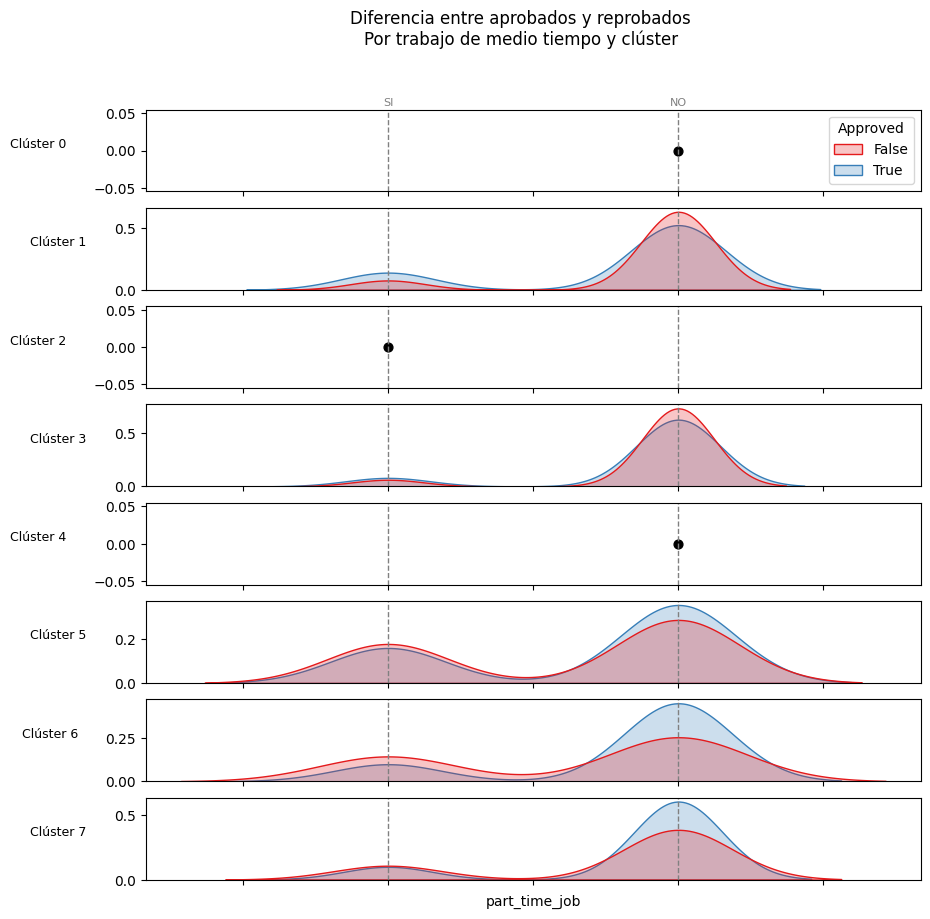

In [198]:
figure, axis = pyplot.subplots(8, 1, figsize=(10, 10), sharex=True)
for i in range(8):
    indices = pandas.Series(g)[g == i].index
    a = pandas.Series(x15[indices] >= 1, name="Approved")
    seaborn.kdeplot(x=x6[indices], hue=a, palette="Set1", ax=axis[i], fill=True, warn_singular=False)
    if x6[indices].var() < 1e-5:
        axis[i].scatter([x6[indices].mean()], [0], color="black", s=40, label="Singularidad")
    axis[i].set_ylabel(f"Clúster {i}", rotation=0, labelpad=40, fontsize=9)
    axis[i].axvline(-1, color="grey", linestyle="--", linewidth=1)
    axis[i].axvline(1, color="grey", linestyle="--", linewidth=1)
    if i == 0:
        axis[i].text(-1, axis[i].get_ylim()[1] * 1.1, "SI", color="gray", ha="center", fontsize=8)
        axis[i].text(1, axis[i].get_ylim()[1] * 1.1, "NO", color="gray", ha="center", fontsize=8)
    if i < 7:
        axis[i].set_xlabel("")
        axis[i].set_xticklabels([])
    if i > 0:
        axis[i].get_legend().remove()
        pass
figure.suptitle("Diferencia entre aprobados y reprobados\nPor trabajo de medio tiempo y clúster")
pyplot.show()

**Comentarios**

Podemos observar un comportamiento invertido en algunos clústeres entre la cantidad de aprobados y reprobados, y si tienen o no trabajo de medio tiempo.

Por ejemplo, para el *Clúster 1* y el *Clúster 3* hay más reprobados que no reprobados en los que no tienen un trabajo de medio tiempo, mientras que en el *Clúster 5*, *Clúster 6* y *Clúster 7* hay más aprobados que reprobados.

Un efecto inverso se ve si tienen trabajo de medio tiempo, ya que en el *Clúster 5*, *Clúster 6* y *Clúster 7* hay más reprobados que aprobados en los que tienen un trabajo de medio tiempo, mientras que en el *Clúster 1* y el *Clúster 3* hay más aprobados que reprobados.

Encontrando algunas singularidades en los otros clústers que indican que todos tienen trabajo de medio tiempo o no lo tienen.

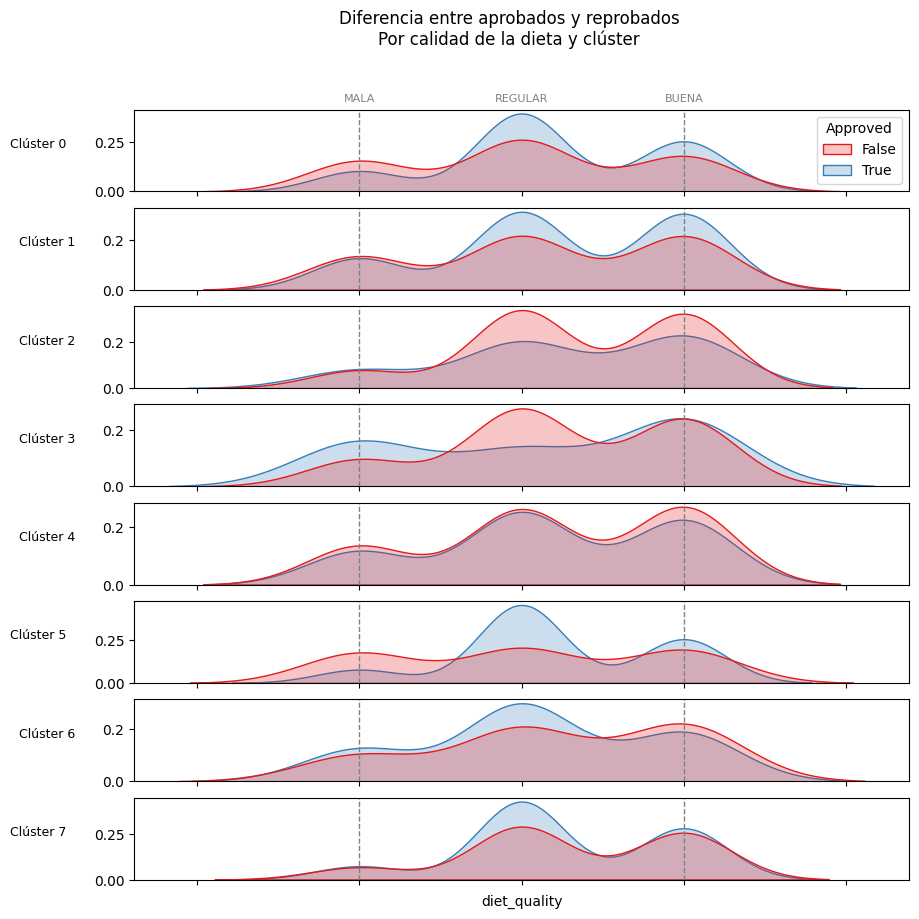

In [205]:
figure, axis = pyplot.subplots(8, 1, figsize=(10, 10), sharex=True)
for i in range(8):
    indices = pandas.Series(g)[g == i].index
    a = pandas.Series(x15[indices] >= 1, name="Approved")
    seaborn.kdeplot(x=x9[indices], hue=a, palette="Set1", ax=axis[i], fill=True, warn_singular=False)
    if x9[indices].var() < 1e-5:
        axis[i].scatter([x9[indices].mean()], [0], color="black", s=40, label="Singularidad")
    axis[i].set_ylabel(f"Clúster {i}", rotation=0, labelpad=40, fontsize=9)
    axis[i].axvline(-1, color="grey", linestyle="--", linewidth=1)
    axis[i].axvline(1, color="grey", linestyle="--", linewidth=1)
    if i == 0:
        axis[i].text(-1, axis[i].get_ylim()[1] * 1.1, "MALA", color="gray", ha="center", fontsize=8)
        axis[i].text(0, axis[i].get_ylim()[1] * 1.1, "REGULAR", color="gray", ha="center", fontsize=8)
        axis[i].text(1, axis[i].get_ylim()[1] * 1.1, "BUENA", color="gray", ha="center", fontsize=8)
    if i < 7:
        axis[i].set_xlabel("")
        axis[i].set_xticklabels([])
    if i > 0:
        axis[i].get_legend().remove()
        pass
figure.suptitle("Diferencia entre aprobados y reprobados\nPor calidad de la dieta y clúster")
pyplot.show()

**Comentarios**

Podemos observar que la calidad de dieta no tiene un efecto generalizado y se comporta diferente entre los clústeres, por lo que la cantidad de aprobados y reprobados varía según el clúster en distintas dietas.

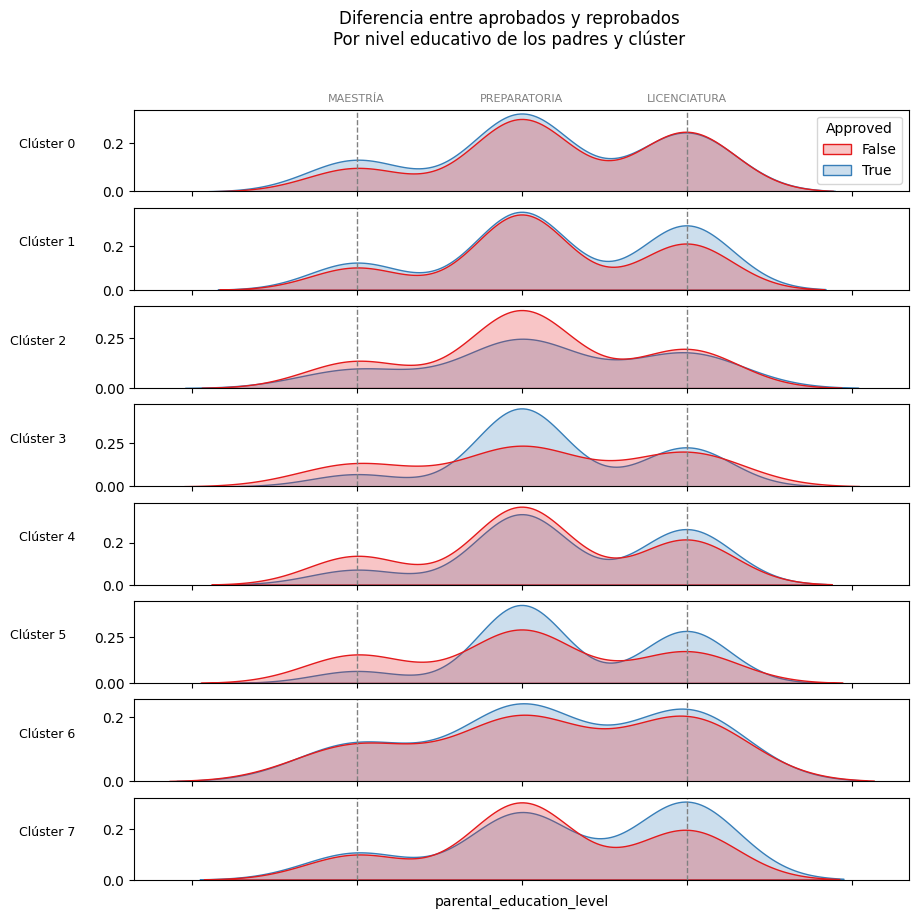

In [207]:
figure, axis = pyplot.subplots(8, 1, figsize=(10, 10), sharex=True)
for i in range(8):
    indices = pandas.Series(g)[g == i].index
    a = pandas.Series(x15[indices] >= 1, name="Approved")
    seaborn.kdeplot(x=x11[indices], hue=a, palette="Set1", ax=axis[i], fill=True, warn_singular=False)
    if x11[indices].var() < 1e-5:
        axis[i].scatter([x11[indices].mean()], [0], color="black", s=40, label="Singularidad")
    axis[i].set_ylabel(f"Clúster {i}", rotation=0, labelpad=40, fontsize=9)
    axis[i].axvline(-1, color="grey", linestyle="--", linewidth=1)
    axis[i].axvline(1, color="grey", linestyle="--", linewidth=1)
    if i == 0:
        axis[i].text(-1, axis[i].get_ylim()[1] * 1.1, "MAESTRÍA", color="gray", ha="center", fontsize=8)
        axis[i].text(0, axis[i].get_ylim()[1] * 1.1, "PREPARATORIA", color="gray", ha="center", fontsize=8)
        axis[i].text(1, axis[i].get_ylim()[1] * 1.1, "LICENCIATURA", color="gray", ha="center", fontsize=8)
    if i < 7:
        axis[i].set_xlabel("")
        axis[i].set_xticklabels([])
    if i > 0:
        axis[i].get_legend().remove()
        pass
figure.suptitle("Diferencia entre aprobados y reprobados\nPor nivel educativo de los padres y clúster")
pyplot.show()

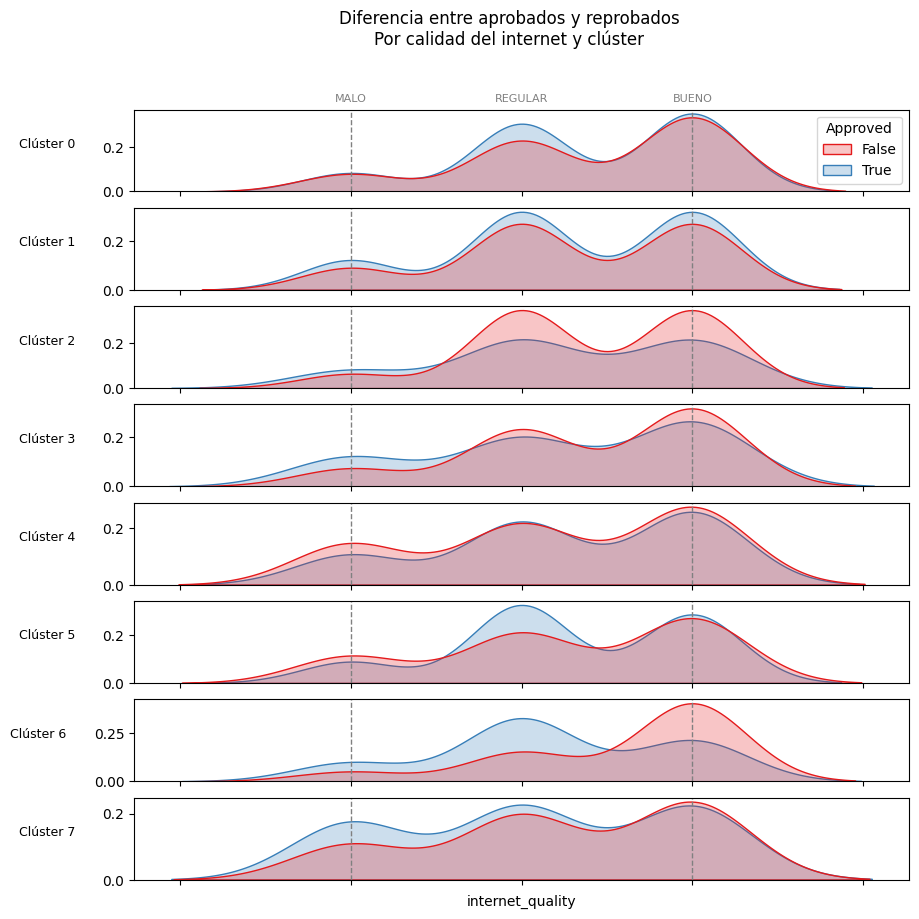

In [209]:
figure, axis = pyplot.subplots(8, 1, figsize=(10, 10), sharex=True)
for i in range(8):
    indices = pandas.Series(g)[g == i].index
    a = pandas.Series(x15[indices] >= 1, name="Approved")
    seaborn.kdeplot(x=x12[indices], hue=a, palette="Set1", ax=axis[i], fill=True, warn_singular=False)
    if x12[indices].var() < 1e-5:
        axis[i].scatter([x12[indices].mean()], [0], color="black", s=40, label="Singularidad")
    axis[i].set_ylabel(f"Clúster {i}", rotation=0, labelpad=40, fontsize=9)
    axis[i].axvline(-1, color="grey", linestyle="--", linewidth=1)
    axis[i].axvline(1, color="grey", linestyle="--", linewidth=1)
    if i == 0:
        axis[i].text(-1, axis[i].get_ylim()[1] * 1.1, "MALO", color="gray", ha="center", fontsize=8)
        axis[i].text(0, axis[i].get_ylim()[1] * 1.1, "REGULAR", color="gray", ha="center", fontsize=8)
        axis[i].text(1, axis[i].get_ylim()[1] * 1.1, "BUENO", color="gray", ha="center", fontsize=8)
    if i < 7:
        axis[i].set_xlabel("")
        axis[i].set_xticklabels([])
    if i > 0:
        axis[i].get_legend().remove()
        pass
figure.suptitle("Diferencia entre aprobados y reprobados\nPor calidad del internet y clúster")
pyplot.show()

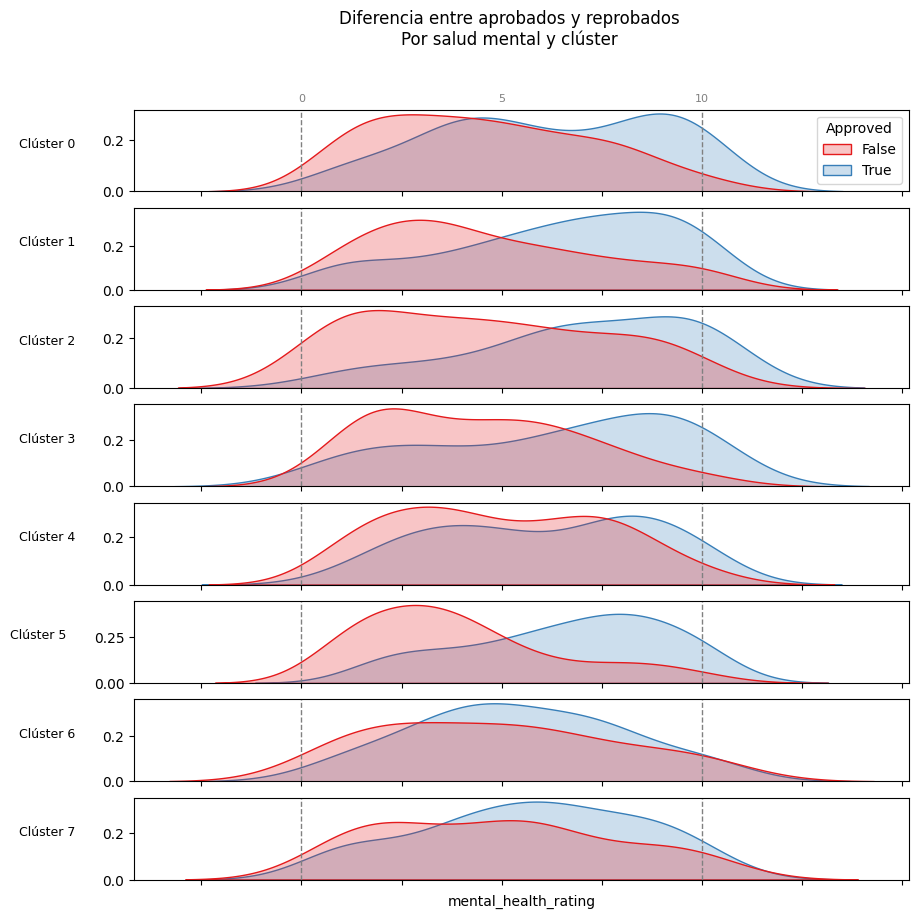

In [214]:
figure, axis = pyplot.subplots(8, 1, figsize=(10, 10), sharex=True)
for i in range(8):
    indices = pandas.Series(g)[g == i].index
    a = pandas.Series(x15[indices] >= 1, name="Approved")
    seaborn.kdeplot(x=x13[indices], hue=a, palette="Set1", ax=axis[i], fill=True, warn_singular=False)
    if x13[indices].var() < 1e-5:
        axis[i].scatter([x13[indices].mean()], [0], color="black", s=40, label="Singularidad")
    axis[i].set_ylabel(f"Clúster {i}", rotation=0, labelpad=40, fontsize=9)
    axis[i].axvline(-1, color="grey", linestyle="--", linewidth=1)
    axis[i].axvline(1, color="grey", linestyle="--", linewidth=1)
    if i == 0:
        axis[i].text(-1, axis[i].get_ylim()[1] * 1.1, "0", color="gray", ha="center", fontsize=8)
        axis[i].text(0, axis[i].get_ylim()[1] * 1.1, "5", color="gray", ha="center", fontsize=8)
        axis[i].text(1, axis[i].get_ylim()[1] * 1.1, "10", color="gray", ha="center", fontsize=8)
    if i < 7:
        axis[i].set_xlabel("")
        axis[i].set_xticklabels([])
    if i > 0:
        axis[i].get_legend().remove()
        pass
figure.suptitle("Diferencia entre aprobados y reprobados\nPor salud mental y clúster")
pyplot.show()

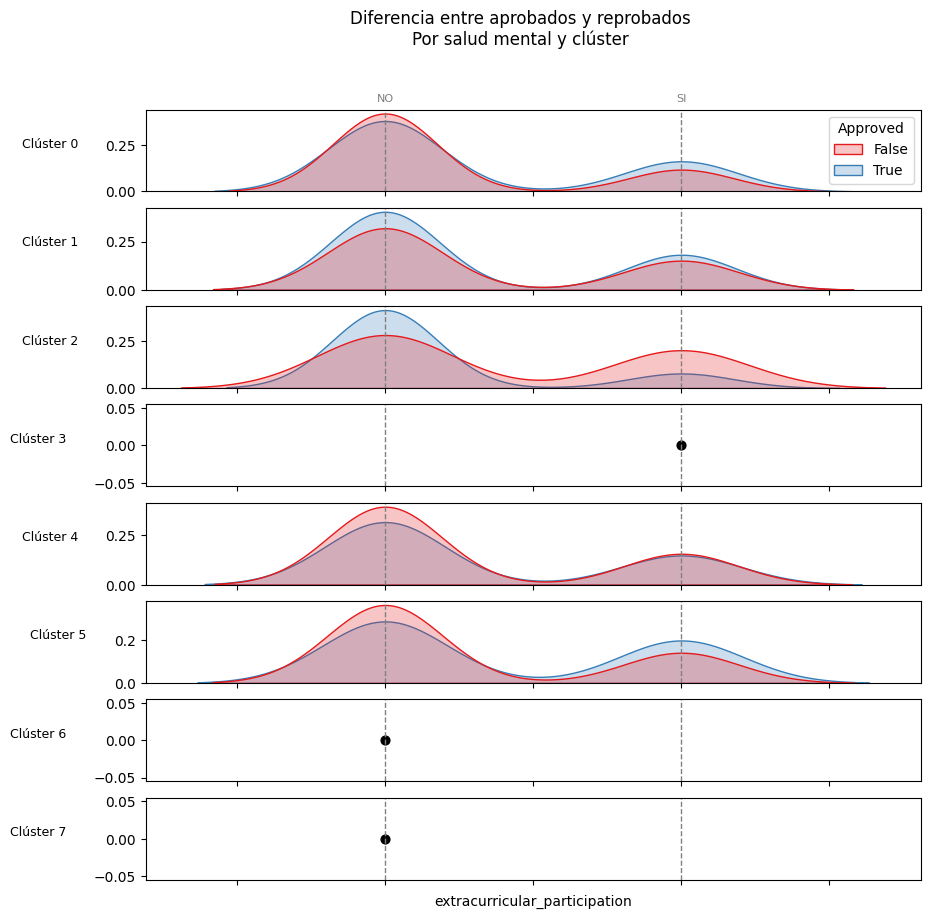

In [217]:
figure, axis = pyplot.subplots(8, 1, figsize=(10, 10), sharex=True)
for i in range(8):
    indices = pandas.Series(g)[g == i].index
    a = pandas.Series(x15[indices] >= 1, name="Approved")
    seaborn.kdeplot(x=x14[indices], hue=a, palette="Set1", ax=axis[i], fill=True, warn_singular=False)
    if x14[indices].var() < 1e-5:
        axis[i].scatter([x14[indices].mean()], [0], color="black", s=40, label="Singularidad")
    axis[i].set_ylabel(f"Clúster {i}", rotation=0, labelpad=40, fontsize=9)
    axis[i].axvline(-1, color="grey", linestyle="--", linewidth=1)
    axis[i].axvline(1, color="grey", linestyle="--", linewidth=1)
    if i == 0:
        axis[i].text(-1, axis[i].get_ylim()[1] * 1.1, "NO", color="gray", ha="center", fontsize=8)
        axis[i].text(1, axis[i].get_ylim()[1] * 1.1, "SI", color="gray", ha="center", fontsize=8)
    if i < 7:
        axis[i].set_xlabel("")
        axis[i].set_xticklabels([])
    if i > 0:
        axis[i].get_legend().remove()
        pass
figure.suptitle("Diferencia entre aprobados y reprobados\nPor salud mental y clúster")
pyplot.show()

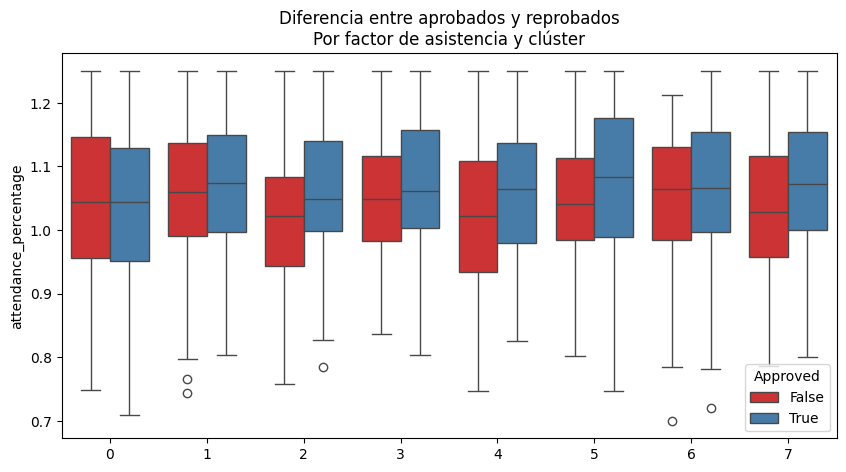

In [219]:
figure, axis = pyplot.subplots(figsize=(10, 5))
a = pandas.Series(x15 >= 1, name="Approved")
seaborn.boxplot(x=g, y=x7, hue=a, palette="Set1", ax=axis)
pyplot.title("Diferencia entre aprobados y reprobados\nPor factor de asistencia y clúster")
pyplot.show()

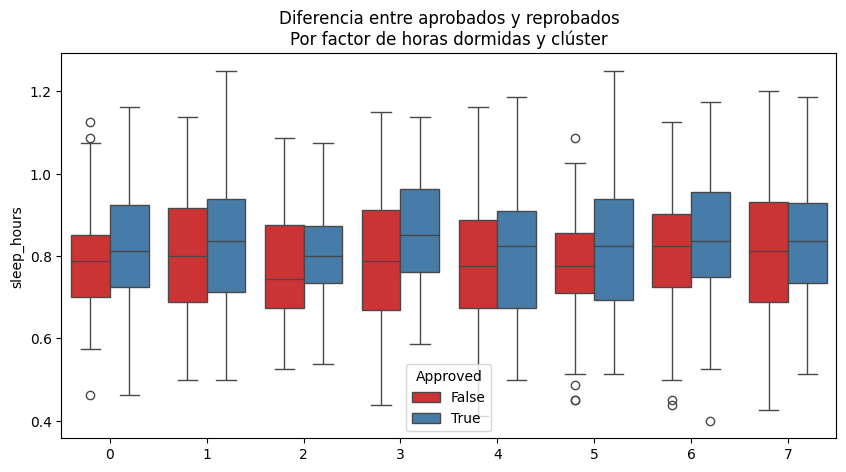

In [221]:
figure, axis = pyplot.subplots(figsize=(10, 5))
a = pandas.Series(x15 >= 1, name="Approved")
seaborn.boxplot(x=g, y=x8, hue=a, palette="Set1", ax=axis)
pyplot.title("Diferencia entre aprobados y reprobados\nPor factor de horas dormidas y clúster")
pyplot.show()

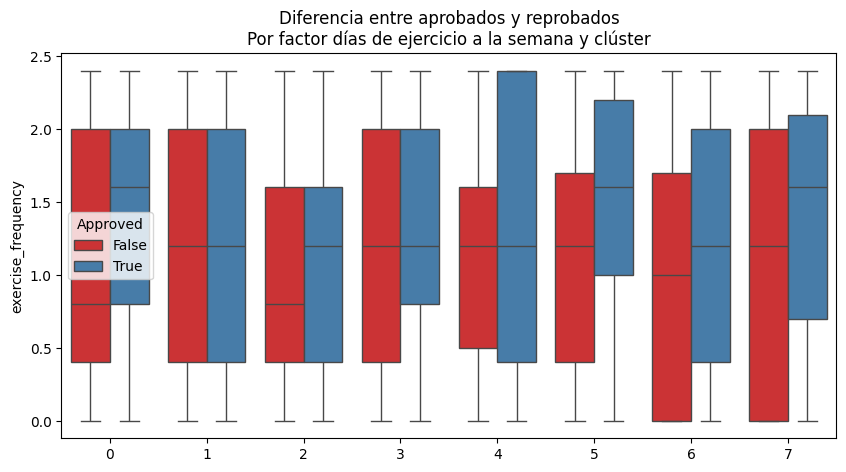

In [224]:
figure, axis = pyplot.subplots(figsize=(10, 5))
a = pandas.Series(x15 >= 1, name="Approved")
seaborn.boxplot(x=g, y=x10, hue=a, palette="Set1", ax=axis)
pyplot.title("Diferencia entre aprobados y reprobados\nPor factor días de ejercicio a la semana y clúster")
pyplot.show()